<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")
df.notnull().sum().sort_values()

BlockchainIs           8915
CodeRevHrs             9083
BlockchainOrg          9198
MiscTechWorkedWith     9343
SONewContent           9557
                      ...  
Employment            11552
OpenSourcer           11552
Hobbyist              11552
MainBranch            11552
Respondent            11552
Length: 85, dtype: int64

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [7]:
#Example
#combined = df
#dups = combined.duplicated(['COUNTRY', 'YEAR'])
#combined_dups = combined[dups]
#somaliland_combined = combined[combined['COUNTRY'] == 'SOMALILAND REGION']
#print(combined.notnull().sum().sort_values())
#the thresh parameter to only drop columns if they contain below a certain number of non-null values.
#combined = combined.dropna(thresh=159, axis=1)
#missing = combined.isnull().sum()

#sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
#sns.heatmap(sorted.isnull(), cbar=False)
#plt.show()

#pivot_table = combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

In [8]:
df.duplicated().value_counts()

False    11398
True       154
Name: count, dtype: int64

In [9]:
df.duplicated(subset="Respondent").value_counts()

False    11398
True       154
Name: count, dtype: int64

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [10]:
df.drop_duplicates(inplace=True) #To keep the last duplicate row, set the keep parameter to 'last'

Verify if duplicates were actually dropped.


In [11]:
df.duplicated().value_counts()

False    11398
Name: count, dtype: int64

## Finding Missing values


Find the missing values for all columns.


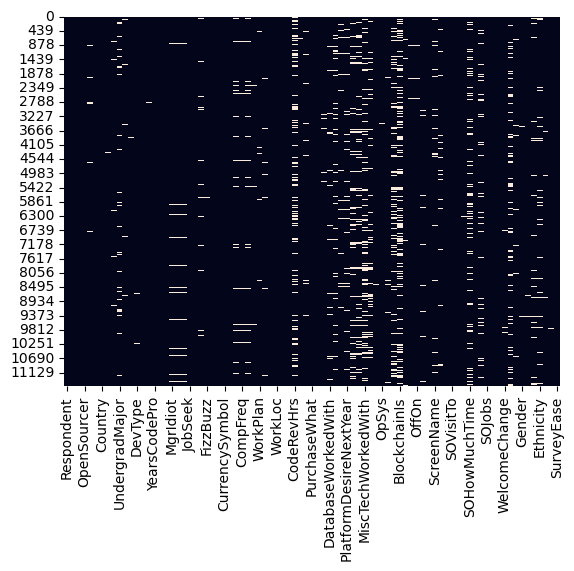

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#combined_updated = combined.set_index('YEAR')
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [13]:
pd.options.display.max_rows = None
df.isnull().sum().sort_values(ascending=False)

BlockchainIs              2610
CodeRevHrs                2426
BlockchainOrg             2322
MiscTechWorkedWith        2182
SONewContent              1965
SOHowMuchTime             1917
WebFrameDesireNextYear    1617
MiscTechDesireNextYear    1455
WebFrameWorkedWith        1393
SOPartFreq                1128
DatabaseDesireNextYear    1042
ConvertedComp              816
CompTotal                  809
UndergradMajor             737
Ethnicity                  675
PlatformDesireNextYear     544
Sexuality                  542
ScreenName                 507
MgrMoney                   497
MgrIdiot                   493
MgrWant                    493
DatabaseWorkedWith         453
LastInt                    413
PlatformWorkedWith         411
SOVisit1st                 325
SocialMedia                293
Age                        287
CompFreq                   206
PurchaseHow                196
WorkChallenge              164
EduOther                   164
Dependents                 140
Language

Find out how many rows are missing in the column 'WorkLoc'


In [16]:
df["WorkLoc"].isnull().sum()

32

## Imputing missing values


Find the  value counts for the column WorkLoc.


In [17]:
df["WorkLoc"].value_counts(dropna=False)

WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
NaN                                                 32
Name: count, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [18]:
common_work_loc = df["WorkLoc"].value_counts().idxmax()
common_work_loc

'Office'

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [19]:
df["WorkLoc"].replace("",np.nan,inplace=True)
df["WorkLoc"].replace(np.nan,common_work_loc,inplace=True)
df["WorkLoc"].value_counts()

WorkLoc
Office                                            6838
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [20]:
df["WorkLoc"].isnull().sum()

0

In [21]:
df["EdLevel"].isnull().sum()
df["Country"].isnull().sum()

0

In [22]:
common_empl = df["Employment"].value_counts().idxmax()
common_empl

'Employed full-time'

In [23]:
lst_common_ugmajor = df["UndergradMajor"].value_counts().idxmin()
lst_common_ugmajor

'A health science (ex. nursing, pharmacy, radiology)'

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [24]:
print(df["CompFreq"].value_counts(dropna=False))
df["CompFreq"].unique()

CompFreq
Yearly     6073
Monthly    4788
Weekly      331
NaN         206
Name: count, dtype: int64


array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [25]:
df1=df.copy()
df1.loc[df['CompFreq'] == 'Yearly', 'NormalizedAnnualCompensation'] = df1['CompTotal']
df1.loc[df['CompFreq'] == 'Monthly', 'NormalizedAnnualCompensation'] = df1['CompTotal'] * 12
df1.loc[df['CompFreq'] == 'Weekly', 'NormalizedAnnualCompensation'] = df1['CompTotal'] * 52
df1["NormalizedAnnualCompensation"].median()

100000.0

In [26]:
df["NormalizedAnnualCompensation"] = df1["NormalizedAnnualCompensation"]
df["NormalizedAnnualCompensation"].median()

100000.0

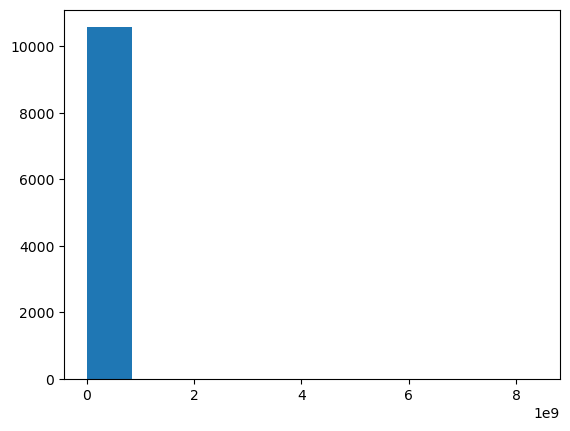

In [27]:
import matplotlib.pyplot as plt

plt.hist(df["NormalizedAnnualCompensation"])
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11398 entries, 0 to 11551
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    11398 non-null  int64  
 1   MainBranch                    11398 non-null  object 
 2   Hobbyist                      11398 non-null  object 
 3   OpenSourcer                   11398 non-null  object 
 4   OpenSource                    11317 non-null  object 
 5   Employment                    11398 non-null  object 
 6   Country                       11398 non-null  object 
 7   Student                       11347 non-null  object 
 8   EdLevel                       11286 non-null  object 
 9   UndergradMajor                10661 non-null  object 
 10  EduOther                      11234 non-null  object 
 11  OrgSize                       11302 non-null  object 
 12  DevType                       11333 non-null  object 
 13  YearsC

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
